# Visualizing Bathymetry Maps
The notebook demonstrates two ways to visualize a 2D grid using `matplotlib`. This particular application is for bathymetry data in the Ross Sea under the Ross ice shelf, but it could be applied equally for other gridded two-dimensional data sets.

### Import modules
Begin by importing the modules for this notebook. The first line allows for iteractive plots (rather than static plots).

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import cmocean.cm as cm

### Step 1: Read in the bathymetry grid
Start by reading in the bathymetry data for a given region. This example uses bathymetry from a subset of the [Bed Machine Antarctica](https://nsidc.org/data/nsidc-0756/versions/3) dataset available on the NSIDC website. 

In [2]:
ds = nc4.Dataset('BedMachineAntarctica-v3-RossSeaSubset.nc')
x = ds.variables['x'][:]
y = ds.variables['y'][:]
elevation = ds.variables['bed'][:, :]
ds.close()

Since this notebook is designed to explore bathymetry data, set points above sea level to 0.

In [3]:
# set points above sea level to 0
elevation[elevation>0]=0

### Step 2: Plot in 2D
A simple way to view a 2D grid is to plot the data in a planar view. A convenient function for this in `matplotlib` is the `pcolormesh` function.

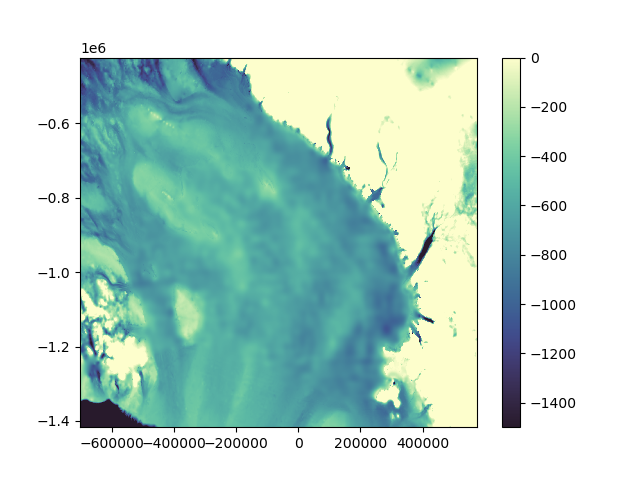

In [4]:
fig = plt.figure()
C = plt.pcolormesh(x,y,elevation,cmap=cm.deep_r, vmin=-1500, vmax=0)
plt.colorbar(C)
plt.show()

### Step 3: Plot in 3D
Another option is to view the data as a surface in 3D. The `matplotlib` library also includes some functionality for this type of plotting using a 3D projection. First, if the coordinate data is one-dimensional, as in this example, convert it to two-dimensional grid:

In [5]:
X,Y = np.meshgrid(x,y)

Then, plot the data similar to the plot above:

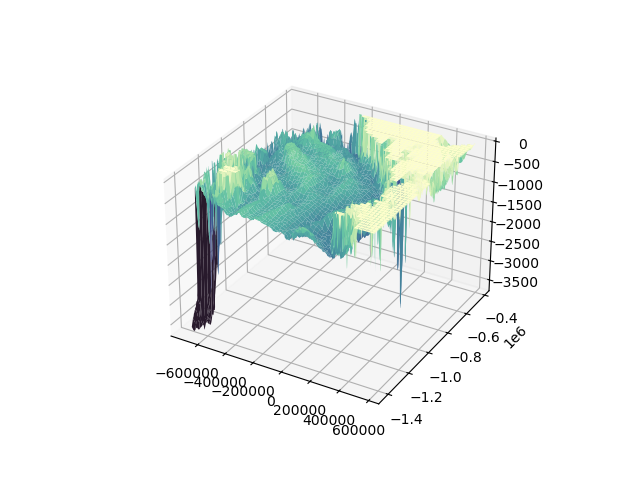

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
C = ax.plot_surface(X, Y, elevation, cmap=cm.deep_r, vmin=-1500, vmax=0,
                       linewidth=0)
plt.show()

Note that the plot can be rotated and explored when using the interactive matplotlib widget.